# Introduction to the Dataset



#### Dataset Selection and Motivation
#### The dataset chosen for this project focuses on employee salaries and their relationships with various attributes such as job title, experience level, education, and demographics. The motivation behind selecting this dataset is to analyze how different factors influence salaries and whether machine learning models can accurately predict salaries and classify employees into salary categories.

### Classification Questions: Given an individual's Age and Years of Experience, predict whether their Salary is greater than 70,000


### Importing Libraries

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

print("Libraries Imported Successfully!")


Libraries Imported Successfully!


### Loading the Dataset

In [4]:

# Load the dataset
import pandas as pd
data = pd.read_csv('Salary Data.csv')

# Display first few rows
print("Dataset Preview:")
print(data.head())

# Check column names
print("\nColumns in dataset:")
print(data.columns.tolist())


Dataset Preview:
    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  

Columns in dataset:
['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience', 'Salary']


### Modified dataset

In [6]:

# Convert 'Gender' column to numeric values (Male = 1, Female = 0)
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})

# Convert 'Salary' into binary classification (Low: 0, High: 1)
salary_median = data['Salary'].median()
data['Salary_Class'] = (data['Salary'] > salary_median).astype(int)

# Drop the original salary column
data.drop(columns=['Salary'], inplace=True)

# Display modified dataset
print("Modified Dataset:")
print(data.head())


Modified Dataset:
    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0     1.0      Bachelor's  Software Engineer                  5.0   
1  28.0     0.0        Master's       Data Analyst                  3.0   
2  45.0     1.0             PhD     Senior Manager                 15.0   
3  36.0     0.0      Bachelor's    Sales Associate                  7.0   
4  52.0     1.0        Master's           Director                 20.0   

   Salary_Class  
0             0  
1             0  
2             1  
3             0  
4             1  


### Visualizing Gender Distribution

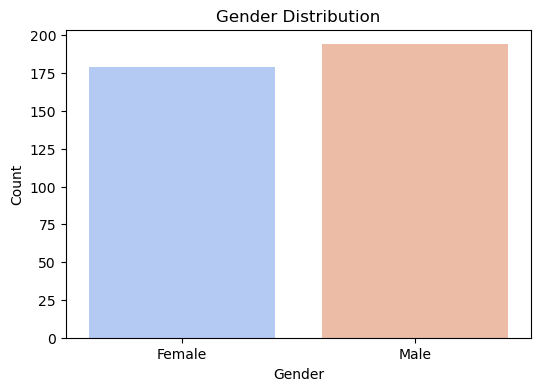

In [8]:

# Visualizing Gender Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=data['Gender'], palette='coolwarm')
plt.xticks(ticks=[0,1], labels=['Female', 'Male'])
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


### Class Distribution of Salary Categories

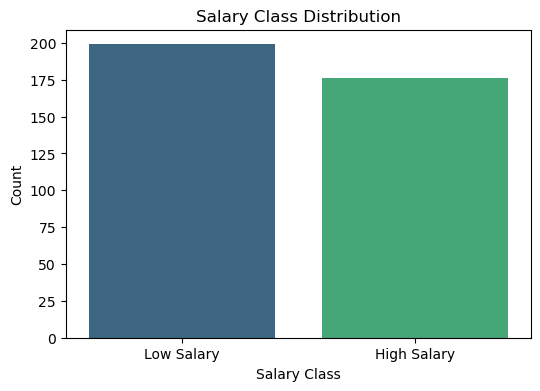

In [10]:

# Class Distribution of Salary Categories
plt.figure(figsize=(6, 4))
sns.countplot(x=data['Salary_Class'], palette='viridis')
plt.xticks(ticks=[0,1], labels=['Low Salary', 'High Salary'])
plt.title("Salary Class Distribution")
plt.xlabel("Salary Class")
plt.ylabel("Count")
plt.show()


### Encoding categorical variables

In [12]:

# Encoding categorical variables if needed
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

print("Categorical Variables Encoded Successfully!")


Categorical Variables Encoded Successfully!


### Feature Correlation Heatmap

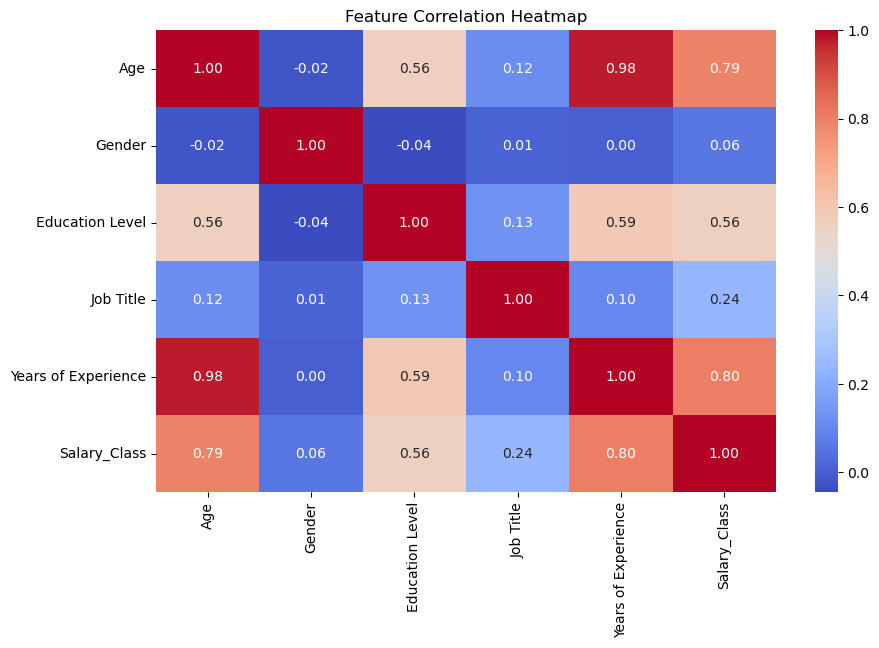

In [14]:

# Feature Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


### Handling missing values in features

In [24]:
# Define features (X) and target variable (y)
X = data.drop(columns=['Salary_Class'])  # Assuming 'Salary_Class' is the target variable
y = data['Salary_Class']

# Handling missing values in features (X)
for column in X.columns:
    if X[column].isnull().sum() > 0:
        if X[column].dtype == 'object':  # Categorical column - fill with mode
            X[column].fillna(X[column].mode()[0], inplace=True)
        else:  # Numerical column - fill with median
            X[column].fillna(X[column].median(), inplace=True)

print("Missing values handled successfully!")


Missing values handled successfully!


### Feature Scaling

In [26]:

# Define features and target variable
X = data.drop(columns=['Salary_Class'])
y = data['Salary_Class']

# Feature Scaling
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

print("Feature Scaling Completed!")


Feature Scaling Completed!


### Splitting data into training and testing sets

In [28]:

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data Split into Training and Testing Sets!")


Data Split into Training and Testing Sets!


In [32]:
# Check for and handle missing values in training and testing data
X_train.fillna(X_train.median(), inplace=True)
X_test.fillna(X_test.median(), inplace=True)

print("Missing values handled in training and testing data!")

# Train a Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predictions
y_pred_log_reg = log_reg.predict(X_test)

# Evaluation
print("Logistic Regression Model Performance:")
print(classification_report(y_test, y_pred_log_reg))


Missing values handled in training and testing data!
Logistic Regression Model Performance:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89        40
           1       0.93      0.80      0.86        35

    accuracy                           0.88        75
   macro avg       0.89      0.88      0.88        75
weighted avg       0.89      0.88      0.88        75



### Train a Random Forest model

In [34]:

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest Model Performance:")
print(classification_report(y_test, y_pred_rf))


Random Forest Model Performance:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        40
           1       0.94      0.91      0.93        35

    accuracy                           0.93        75
   macro avg       0.93      0.93      0.93        75
weighted avg       0.93      0.93      0.93        75



### Matrix Visualization for Logistic Regression and Random Forest

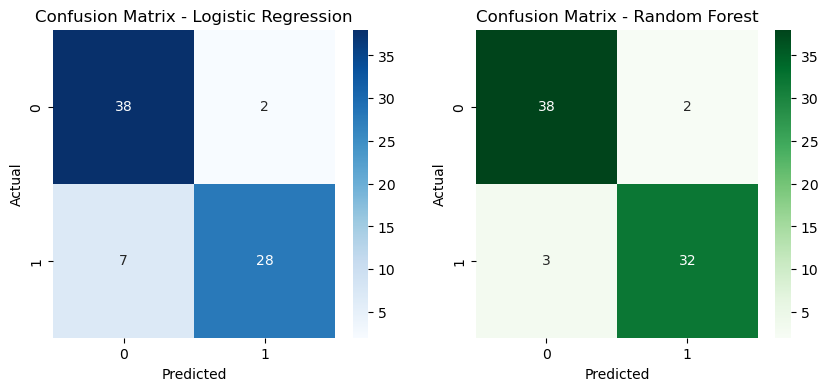

In [36]:

# Confusion Matrix Visualization for Logistic Regression
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Confusion Matrix for Random Forest
plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, cmap='Greens', fmt='d')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()


### Accuracy scores

Logistic Regression Accuracy: 0.8800
Random Forest Accuracy: 0.9333


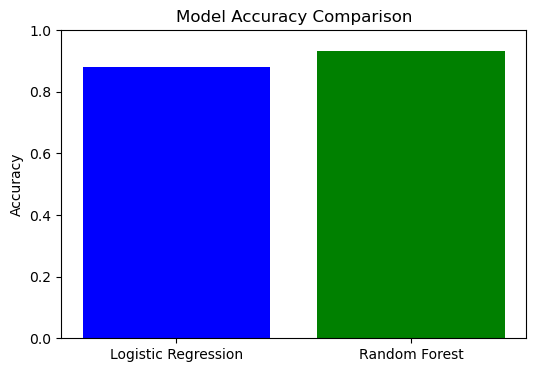

In [38]:

# Compare accuracy scores
log_reg_acc = accuracy_score(y_test, y_pred_log_reg)
rf_acc = accuracy_score(y_test, y_pred_rf)

print(f"Logistic Regression Accuracy: {log_reg_acc:.4f}")
print(f"Random Forest Accuracy: {rf_acc:.4f}")

# Visualize comparison
plt.figure(figsize=(6, 4))
plt.bar(['Logistic Regression', 'Random Forest'], [log_reg_acc, rf_acc], color=['blue', 'green'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()
